In [1]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import model_from_json
import numpy
import os
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [2]:
# load pima indians dataset
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('pima-indians-diabetes.data.csv', names=col_names)
# # load pima indians dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# selection of relevant features
label = df['label']
df.drop('label', axis=1, inplace=True)

X, Y = df, label
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


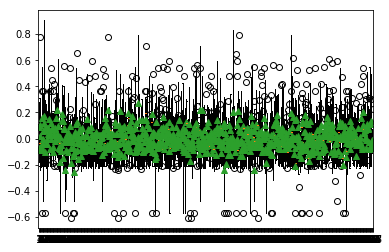

In [4]:
# df_norm.columns
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.describe()
import matplotlib.pyplot as plt
plt.boxplot(df_norm, showmeans=True)
plt.show()

In [3]:
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]


In [4]:
X.shape

(768, 8)

In [6]:
from keras import regularizers
from keras import optimizers

# create model
model = Sequential()

model.add(Dense(16, input_dim=8, kernel_initializer='glorot_uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(8, kernel_initializer='glorot_uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(4, kernel_initializer='glorot_uniform', activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# model.add(Dense(16, input_dim=8, kernel_initializer='glorot_uniform', activation='relu'))
# model.add(Dense(8, kernel_initializer='uniform', activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dense(2, kernel_initializer='uniform', activation='relu', kernel_initializer='glorot_uniform'))
#model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid', kernel_initializer='glorot_uniform'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.25)
print x_train.shape
from keras.callbacks import History 
history = History()

# Fit the model
history=model.fit(x_train, y_train, epochs=5000, batch_size=128, verbose=0,validation_data=(x_val, y_val))


(576, 8)


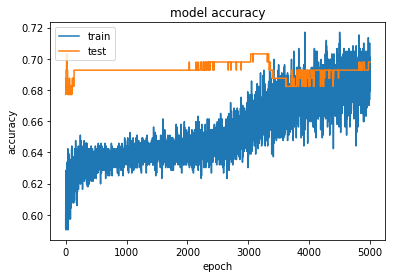

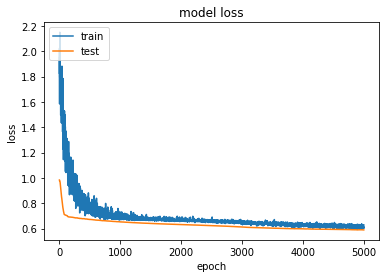

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 64.32%


In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


In [ ]:
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))